# Chapter #2: Regression

## 1. Introduction to regression

**Introduction to regression**
> - Now we're going to check out the other type of supervised learning: regression.
> - In regression tasks, the target variable typically has continuous values, such as a country's GDP, or the price of a house.

**Predicting blood glucose levels**
> - To conceptualize regression problems, let's use a dataset containing women's health data to predict blood glucose levels.
> - We load the dataset as a pandas DataFrame, and print the first five rows.
> - It contains features including number of pregnancies, triceps skinfold measurements, insulin levels, body mass index, known as BMI, age in years, and diabetes status, with one indicating a diagnosis, and zero representing the absence of a diagnosis.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_01_introduction_to_regression_img01.png">

**Creating feature and target arrays**
> - Recall that scikit-learn requires features and target values in distinct variables, `X` and `y`:
>> - To use all of the features in our dataset, we drop our target, blood glucose levels, and store the values attribute as `X`,
>> - For `y`, we take the the target column's values attribute.
> - We can print the type for `X` and `y` to confirm they are now both NumPy arrays.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_01_introduction_to_regression_img02.png">

**Making predictions from a single feature**
> - To start, let's try to predict blood glucose levels from a single feature: body mass index.
> - To do this, we slice out the BMI column of `X`, which is the fourth column, storing as the variable `X_bmi`.
> - Checking the shape of `y` and `X_bmi`, we see that they are both one-dimensional arrays.
> - This is fine for `y`, but our features must be formatted as a two-dimensional array to be accepted by scikit-learn.
> - To convert the shape of `X_bmi` we apply NumPy's `.reshape()` method, passing minus one followed by one. Printing the shape again shows `X_bmi` is now the correct shape for our model.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_01_introduction_to_regression_img03.png">

**Plotting glucose vs. body mass index**
> - Now, let's plot blood glucose levels as a function of body mass index.
> - We import `matplotlib.pyplot` as `plt`, then pass `X_bmi` and `y` to `pltscatter()`.
> - We'll also label our axes using the `.xlabel()` and `.ylabel()` methods.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_01_introduction_to_regression_img04.png">

**Plotting glucose vs. body mass index**
> - We can see that, generally, as body mass index increases, blood glucose levels also tend to increase.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_01_introduction_to_regression_img05.png">

**Fitting a regression model**
> - It's time to fit a regression model to our data.
> - We're going to use a model called linear regression, which fits a straight line to our data.
> - We will explain the mechanics of linear regression in the next video, but first, let's see how to fit it and plot predictions:
>> - We import `LinearRegression` from `sklearn.linear_model`, and instantiate our regression model,
>> - As we are modeling the relationship between the feature, body mass index, and the target, blood glucose levels, rather than predicting target values for new observations, we fit the model to all of our feature observations,
>> - We do this by calling `reg.fit()` and passing in the feature data and the target variable, the same as we did for classification problems,
>> - After this, we can create the `predictions` variable by calling `reg.predict()` and passing in our features,
>> - As we are predicting the target values of the features used to train the model, this gives us a line of best fit for our data,
>> - We produce our scatter plot again, and then call `plt.plot()` to produce a line plot, passing our features, `X_bmi`, followed by our `predictions`.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_01_introduction_to_regression_img06.png">

**Fitting a regression model**
> - The black line represents the linear regression model's fit of blood glucose values against body mass index, which appears to have a weak-to-moderate positive correlation.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_01_introduction_to_regression_img07.png">

### 1.1. Creating features

In this chapter, you will work with a dataset called `sales_df`, which contains information on advertising campaign expenditure across different media types, and the number of dollars generated in sales for the respective campaign. The dataset has been preloaded for you. Here are the first two rows:

```
     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```

You will use the advertising expenditure as features to predict sales values, initially working with the `"radio"` column. However, before you make any predictions you will need to create the feature and target arrays, reshaping them to the correct format for scikit-learn.

In [1]:
import pandas as pd
sales_df = pd.read_csv("./datasets/advertising_and_sales_clean.csv")
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


- Create `X`, an array of the values from the `sales_df` DataFrame's `"radio"` column.

In [2]:
X = sales_df["radio"].values

- Create `y`, an array of the values from the `sales_df` DataFrame's `"sales"` column.

In [3]:
y = sales_df["sales"].values

- Reshape `X` into a two-dimensional NumPy array.

In [4]:
X = X.reshape(-1, 1)

- Print the shape of `X` and `y`.

In [5]:
print(X.shape, y.shape)

(4546, 1) (4546,)


### 1.2. Building a linear regression model

Now you have created your feature and target arrays, you will train a linear regression model on all feature and target values.

As the goal is to assess the relationship between the feature and target values there is no need to split the data into training and test sets.

`X` and `y` have been preloaded for you as follows:
```
y = sales_df["sales"].values
X = sales_df["radio"].values.reshape(-1, 1)
```

- Import `LinearRegression`.

In [6]:
from sklearn.linear_model import LinearRegression

- Instantiate a linear regression model.

In [7]:
reg = LinearRegression()
reg.fit(X, y);

- Predict sales values using `X`, storing as `predictions`.

In [8]:
predictions = reg.predict(X)
predictions[:5]

array([ 95491.17119147, 117829.51038393, 173423.38071499, 291603.11444202,
       111137.28167129])

### 1.3. Visualizing a linear regression model

Now you have built your linear regression model and trained it using all available observations, you can visualize how well the model fits the data. This allows you to interpret the relationship between `radio` advertising expenditure and `sales` values.

The variables `X`, an array of radio values, `y`, an array of sales values, and `predictions`, an array of the model's predicted values for `y` given `X`, have all been preloaded for you from the previous exercise.

- Import `matplotlib.pyplot` as `plt`.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

- Create a scatter plot visualizing `y` against `X`, with observations in blue.
- Draw a red line plot displaying the `predictions` against `X`.
- Display the plot.

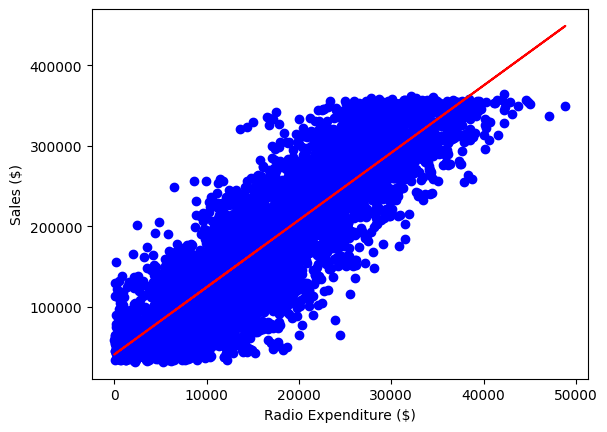

In [10]:
fig, ax = plt.subplots()
ax.scatter(X, y, color="blue")
ax.plot(X, predictions, color="red")
ax.set_xlabel("Radio Expenditure ($)")
ax.set_ylabel("Sales ($)");

## 2. The basics of linear regression

**Regression mechanics**
> - We want to fit a line to the data, and in two dimensions this takes the form of $y = ax + b$.
> - Using a single feature is known as simple linear regression, where `y` is the target, `x` is the feature, and `a` and `b` are the model parameters that we want to learn.
>> - `a` and `b` are also called the model coefficients, or the slope and intercept, respectively.
> - So how do we accurately choose values for `a` and `b`?
>> - We can define an error function for any given line and then choose the line that minimizes this function,
>> - Error functions are also called loss or cost functions.

**The loss function**
> - Let's visualize a loss function using this scatter plot.
> - We want the line to be as close to the observations as possible.
> - Therefore, we want to minimize the vertical distance between the fit and the data.
> - So for each observation, we calculate the vertical distance between it and the line.
> - This distance is called a residual

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_02_the_basics_of_linear_regression_img01.png">

**Ordinary Least Squares**
> - We could try to minimize the sum of the residuals, but then each positive residual would cancel outeach negative residual.
> - To avoid this, we square the residuals.
> - By adding all the squared residuals, we calculate the residual sum of squares, or RSS.
> - This type of linear regression is called Ordinary Least Squares, or OLS, where we aim to minimize the RSS.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_02_the_basics_of_linear_regression_img02.png">

**Linear regression in higher dimensions**
> - When we have two features, `x1` and `x2`, and one target, `y`, a line takes the form $y = a1x1 + a2x2 + b$.
> - So to fit a linear regression model we specify three variables, `a1`, `a2`, and the intercept, `b`.
> - When adding more features, it is known as multiple linear regression.
> - Fitting a multiple linear regression model means specifying a coefficient, `an`, for `n` number of features, and `b`.
> - For multiple linear regression models, scikit-learn expects one variable each for feature and target values.

**Linear regression using all features**
> - Let's perform linear regression to predict blood glucose levels using all of the features from the diabetes dataset:
>> - We import LinearRegression from `sklearn.linear_model`,
>> - Then we split the data into training and test sets, instantiate the model, fit it on the training set, and predict on the test set.
> - Note that linear regression in scikit-learn performs OLS under the hood.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_02_the_basics_of_linear_regression_img03.png">

**R-squared**
> - The default metric for linear regression is R-squared, which quantifies the amount of variance in the target variable that is explained by the features.
> - Values can range from zero to one, with one meaning the features completely explain the target's variance.
> - Here are two plots visualizing high and low R-squared respectively.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_02_the_basics_of_linear_regression_img04.png">

**R-squared in scikit-learn**
> - To compute R-squared, we call the model's `.score()` method, passing the test features and targets.
> - Here the features only explain about 35% of blood glucose level variance.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_02_the_basics_of_linear_regression_img05.png">

**Mean squared error and root mean squared error**
> - Another way to assess a regression model's performance is to take the mean of the residual sum of squares.
> - This is known as the mean squared error, or MSE.
> - MSE is measured in units of our target variable, squared:
>> - For example, if a model is predicting a dollar value, MSE will be in dollars squared,
>> - To convert to dollars, we can take the square root, known as the root mean squared error, or RMSE.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_02_the_basics_of_linear_regression_img06.png">

**RMSE in scikit-learn**
> - To calculate RMSE, we import `mean_squared_error` from `sklearn.metrics`, then call `mean_squared_error()`.
> - We pass `y_test` and `y_pred`, and set `squared` equal to `False`, which returns the square root of the MSE.
> - The model has an average error for blood glucose levels of around 24 milligrams per deciliter.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_02_the_basics_of_linear_regression_img07.png">

### 2.1. Fit and predict for regression

Now you have seen how linear regression works, your task is to create a multiple linear regression model using all of the features in the `sales_df` dataset, which has been preloaded for you. As a reminder, here are the first two rows:

```
     tv        radio      social_media    sales
1    13000.0   9237.76    2409.57         46677.90
2    41000.0   15886.45   2913.41         150177.83
```

You will then use this model to predict sales based on the values of the test features.

`LinearRegression` and `train_test_split` have been preloaded for you from their respective modules.

In [11]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [12]:
from sklearn.model_selection import train_test_split

- Create `X`, an array containing values of all features in `sales_df`, and `y`, containing all values from the `"sales"` column.

In [13]:
X = sales_df.drop(columns=["sales", "influencer"]).values
y = sales_df["sales"].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Instantiate a linear regression model.

In [15]:
reg = LinearRegression()

- Fit the model to the training data.

In [16]:
X_train.dtype

dtype('float64')

In [17]:
reg.fit(X_train, y_train);

- Create `y_pred`, making predictions for `sales` using the test features.

In [18]:
y_pred = reg.predict(X_test)

In [19]:
for i, j in zip(y_test[:2], y_pred[:2]):
    print(f"Ground truth --> {i:.2f}")
    print(f"Prediction --> {j:.2f}\n")

Ground truth --> 55261.28
Prediction --> 53176.66

Ground truth --> 67574.90
Prediction --> 70996.20



### 2.2. Regression performance

Now you have fit a model, `reg`, using all features from `sales_df`, and made predictions of sales values, you can evaluate performance using some common regression metrics.

The variables `X_train`, `X_test`, `y_train`, `y_test`, and `y_pred`, along with the fitted model, `reg`, all from the last exercise, have been preloaded for you.

Your task is to find out how well the features can explain the variance in the target values, along with assessing the model's ability to make predictions on unseen data.

- Import `mean_squared_error`.

In [20]:
from sklearn.metrics import mean_squared_error

- Calculate the model's R-squared score by passing the test feature values and the test target values to an appropriate method.

In [21]:
r_squared = reg.score(X_test, y_test)

- Calculate the model's root mean squared error using `y_test` and `y_pred`.

In [22]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

- Print `r_squared` and `rmse`.

In [23]:
print(f"R^2 = {r_squared:.2f}")

R^2 = 1.00


In [24]:
print(f"RMSE = {rmse:.2f}")

RMSE = 2944.43


## 3. Cross-validation

**Cross-validation**
> - Great work on those regression challenges!
> - Hopefully we are now feeling familiar with train test split and computing model performance metrics on our test set.
> - But, there is a potential pitfall of this process.

**Cross-validation motivation**
> - If we're computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data!
> - The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data.
> - To combat this dependence on what is essentially a random split, we use a technique called cross-validation.

**Cross-validation basics**
> - We begin by splitting the dataset into five groups or folds.
> - Then we set aside the first fold as a test set, fit our model on the remaining four folds, predict on our test set, and compute the metric of interest, such as R-squared.
> - Next, we set aside the second fold as our test set, fit on the remaining data, predict on the test set, and compute the metric of interest.
> - Then similarly with the third fold, the fourth fold, and the fifth fold.
> - As a result we get five values of R-squared from which we can compute statistics of interest, such as the mean, median, and 95% confidence intervals.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_03_cross_validation_img01.png">

**Cross-validation and model performance**
> - As we split the dataset into five folds, we call this process 5-fold cross-validation.
> - If we use 10 folds, it is called 10-fold cross-validation.
> - More generally, if we use k folds, it is called k-fold cross-validation or k-fold CV.
> - There is, however, a trade-off:
>> - Using more folds is more computationally expensive,
>> - This is because we are fitting and predicting more times.

**Cross-validation in scikit-learn**
> - To perform k-fold cross-validation in scikit-learn:
>> - We import cross_val_score from `sklearn.model_selection`,
>> - We also import `KFold`, which allows us to set a seed and shuffle our data, making our results repeatable downstream.
>> - We first call `KFold`,
>> - The `n_splits` argument has a default of `5`, but in this case we assign `6`, allowing us to use `6` folds from our dataset for cross-validation,
>> - We also set `shuffle` to `True`, which shuffles our dataset before splitting into folds,
>> - We also assign a seed to the `random_state` keyword argument, ensuring our data would be split in the same way if we repeat the process making the results repeatable downstream,
>> - We save this as the variable `kf`,
>> - As usual, we instantiate our model, in this case, linear regression,
>> - We then call `cross_val_score`, passing the model, the feature data, and the target data as the first three positional arguments,
>> - We also specify the number of folds by setting the keyword argument `cv` equal to our `kf` variable,
> - This returns an array of cross-validation scores, which we assign to `cv_results`.
> - The length of the array is the number of folds utilized.
> - Note that the score reported is R squared, as this is the default score for linear regression.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_03_cross_validation_img02.png">

**Evaluating cross-validation peformance**
> - We can now print the scores.
> - This returns six results ranging from `0.7` to approximately `0.77`.
> - We can calculate the mean score using `np.mean()`, and the standard deviation using `np.std()`.
> - Additionally, we can calculate the 95% confidence interval using the `np.quantile()` function, passing our results followed by a list containing the upper and lower limits of our interval as decimals.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_03_cross_validation_img03.png">

### 3.1. Cross-validation for R-squared

Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The `sales_df` dataset has been split into `y` for the target variable, and `X` for the features, and preloaded for you. `LinearRegression` has been imported from `sklearn.linear_model`.

In [25]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [26]:
X = sales_df.drop(columns=["tv", "influencer", "sales"]).values
y = sales_df["sales"].values

- Import `KFold` and `cross_val_score`.

In [27]:
from sklearn.model_selection import KFold, cross_val_score

- Create `kf` by calling `KFold()`, setting the number of splits to `6`, `shuffle` to `True`, and setting a seed of `5`.

In [28]:
kf = KFold(n_splits=6, shuffle=True, random_state=5)

- Perform cross-validation using `reg` on `X` and y, passing `kf` to `cv`.

In [29]:
reg = LinearRegression()

In [30]:
cv_scores = cross_val_score(reg, X, y, cv=kf)

- Print the `cv_scores`.

In [31]:
for s in cv_scores:
    print(f"{s:.2f}")

0.74
0.77
0.77
0.74
0.75
0.74


### 3.2. Analyzing cross-validation metrics

Now you have performed cross-validation, it's time to analyze the results.

You will display the mean, standard deviation, and 95% confidence interval for `cv_results`, which has been preloaded for you from the previous exercise.

`numpy` has been imported for you as `np`.

In [32]:
import numpy as np

- Calculate and print the mean of the results.

In [33]:
np.mean(cv_scores)

0.7536937414361207

- Calculate and print the standard deviation of `cv_scores`.

In [34]:
np.std(cv_scores)

0.012305389070474737

- Display the 95% confidence interval for your results using `np.quantile()`.

In [35]:
for q in np.quantile(a=cv_scores, q=[0.025, 0.975]):
    print(f"{q:.2f}")

0.74
0.77


## 4. Regularized regression

**Regularized regression**
> - Now let's explore regularization in regression, a technique used to avoid overfitting.

**Why regularize?**
> - Recall that fitting a linear regression model minimizes a loss function to choose a coefficient, `a`, for each feature, and the intercept, `b`.
> - If we allow these coefficients to be very large, we can get overfitting.
> - Therefore, it is common practice to alter the loss function so that it penalizes large coefficients.
> - This is called regularization.

**Ridge regression**
> - The first type of regularized regression that we'll look at is called ridge.
> - With ridge, we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha.
> - So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values.
> - When using ridge, we need to choose the alpha value in order to fit and predict.
> - Essentially, we can select the alpha for which our model performs best:
>> - Picking alpha for ridge is similar to picking k in KNN.
>> - Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters.
>> - Alpha controls model complexity.
>> - When alpha equals zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur.
>> - A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_04_regularized_regression_img01.png">

**Ridge regression in scikit-learn**
> - To perform ridge regression in scikit-learn, we import `Ridge` from `sklearn.linear_model`.
> - To highlight the impact of different `alpha` values, we create an empty list for our scores, then loop through a list of different `alpha` values.
> - Inside the for loop we instantiate `Ridge`, setting the `alpha` keyword argument equal to the iterator, also called `alpha`.
> - We fit on the training data, and predict on the test data.
> - We save the model's R-squared value to the `scores` list.
> - Finally, outside of the loop, we print the `scores` for the models with five different alpha values.
> - We see performance gets worse as `alpha` increases.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_04_regularized_regression_img02.png">

**Lasso regression**
> - There is another type of regularized regression called lasso, where our loss function is the OLS loss function plus the absolute value of each coefficient multiplied by some constant, alpha.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_04_regularized_regression_img03.png">

**Lasso regression in scikit-learn**
> - To use Lasso we import it from `sklearn.linear_model`.
> - The actual method for performing lasso regression in scikit-learn mirrors ridge regression, as we can see here.
> - Performance drops substantially as `alpha` goes over `20`!

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_04_regularized_regression_img04.png">

**Lasso regression for feature selection**
> - Lasso regression can actually be used to assess feature importance.
> - This is because it tends to shrink the coefficients of less important features to zero.
> - The features whose coefficients are not shrunk to zero are selected by the lasso algorithm.
> - Let's check this out in practice.

**Lasso for feature selection in scikit-learn**
> - We import `Lasso`.
> - Next, we create our feature and target arrays, and use the dataset's `.columns` attribute to access the feature names and store as the variable names.
> - As we are calculating feature importance we use the entire dataset, rather than splitting it.
> - We then instantiate `Lasso`, setting alpha to zero-point-one.
> - We fit the model to the data and extract the coefficients using the `.coef_` attribute, storing as `lasso_coef`.
> - We then plot the coefficients for each feature.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_04_regularized_regression_img05.png">

**Lasso for feature selection in scikit-learn**
> - We can see that the most important predictor for our target variable, blood glucose levels, is the binary value for whether an individual has diabetes or not!
> - This is not surprising, but is a great sanity check.
> - This type of feature selection is very important because it allows us to communicate results to non-technical audiences.
> - It is also useful for identifying which factors are important predictors for various physical phenomena.

<img style="margin-left: auto; margin-right: auto;" src="./assets/ch02_04_regularized_regression_img06.png">

### 4.1. Regularized regression: Ridge

Ridge regression performs regularization by computing the squared values of the model parameters multiplied by alpha and adding them to the loss function.

In this exercise, you will fit ridge regression models over a range of different alpha values, and print their R^2 scores. You will use all of the features in the `sales_df` dataset to predict `"sales"`. The data has been split into `X_train`, `X_test`, `y_train`, `y_test` for you.

A variable called `alphas` has been provided as a list containing different alpha values, which you will loop through to generate scores.

In [36]:
import pickle
with open("./assets/ch02_04_01_regularized_regression_ridge_pickled01.pkl", mode="rb") as file_bin:
    pickled_objs = pickle.load(file_bin)

In [37]:
X_train, X_test = pickled_objs["X_train"], pickled_objs["X_test"]
y_train, y_test = pickled_objs["y_train"], pickled_objs["y_test"]

- Import `Ridge`.

In [38]:
from sklearn.linear_model import Ridge

- Instantiate `Ridge`, setting `alpha` equal to `alpha`.
- Fit the model to the training data.
- Calculate the R^2 score for each iteration of `ridge`.

In [39]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

In [40]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

In [41]:
for score in ridge_scores:
    print(score)

0.9990152104759369
0.9990152104759373
0.9990152104759419
0.9990152104759871
0.9990152104764387
0.9990152104809561


### 4.2. Lasso regression for feature importance

In the video, you saw how lasso regression can be used to identify important features in a dataset.

In this exercise, you will fit a lasso regression model to the `sales_df` data and plot the model's coefficients.

The feature and target variable arrays have been pre-loaded as `X` and `y`, along with `sales_columns`, which contains the dataset's feature names.

In [42]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [43]:
X = sales_df.drop(columns=["sales", "influencer"]).values
y = sales_df["sales"].values

In [44]:
sales_columns = sales_df.drop(columns=["sales", "influencer"]).columns
sales_columns

Index(['tv', 'radio', 'social_media'], dtype='object')

- Import `Lasso` from `sklearn.linear_model`.

In [45]:
from sklearn.linear_model import Lasso

- Instantiate a Lasso regressor with an `alpha` of` 0.3`.

In [46]:
lasso = Lasso(alpha=0.3)

- Fit the model to the data.

In [47]:
lasso.fit(X, y);

- Compute the model's coefficients, storing as `lasso_coef`.

In [48]:
lasso_coef = lasso.coef_
lasso_coef

array([ 3.56256962, -0.00397035,  0.00496385])

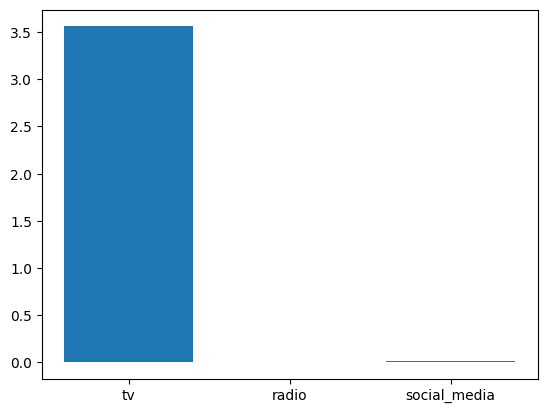

In [49]:
fig, ax = plt.subplots()
ax.bar(x=sales_columns, height=lasso_coef);